
# 📊 Precision Agriculture Data Science Quest 🌱

**Scenario:**  
You have been hired as a data scientist by **AgriSmart AI**, a company specializing in AI-driven precision agriculture. The company collects data from farms using sensors and drones to monitor soil moisture, pH levels, temperature, humidity, and crop conditions to optimize irrigation and fertilization practices. You have received a dataset named `precision_agriculture_with_bad_data.csv` containing 913 records across 10 variables, but it contains several issues including missing values, incorrect data formats, erroneous entries labeled as 'error', and duplicate records.

Your task is to:

- Load this dataset into a Pandas DataFrame and conduct a thorough data inspection to identify the structure, missing values, and data types.
- Clean the dataset by removing duplicate records, replacing erroneous values with `NaN`, and handling missing data appropriately by either filling or dropping values based on logical reasoning.
- Perform an exploratory data analysis by generating descriptive statistics, visualizing the distribution of numeric variables using histograms, and creating a correlation heatmap to examine the relationships between soil and environmental variables.
- From your analysis, identify which variables most influence fertilizer recommendations, determine the crop type with the highest average soil moisture, and suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.
- Finally, export your clean dataset as `cleaned_precision_agriculture_data.csv` and document your insights and recommendations based on the analysis.


In [3]:
# 📥 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 📂 Load Dataset
data_path = 'precision_agriculture_with_bad_data.csv'
df = pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [5]:
# 📊 Inspect Data Structure
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2025-04-22,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [6]:
# 🔍 Identify Missing or Erroneous Data
df.isnull().sum()
df[df.apply(lambda row: row.astype(str).str.contains('error').any(), axis=1)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
107,SEN-1107,2025-04-18,error,error,error,error,Tomatoes,error,error,IMG-2107
118,SEN-1118,2025-04-29,error,error,error,error,Beans,error,error,IMG-2118
244,SEN-1244,2025-09-02,error,error,error,error,Wheat,error,error,IMG-2244
459,SEN-1459,2026-04-05,error,error,error,error,Lettuce,error,error,IMG-2459
683,SEN-1683,2026-11-15,error,error,error,error,Maize,error,error,IMG-2683


In [7]:
# 🧹 Remove Duplicates
df = df.drop_duplicates()
df.shape

(802, 10)

In [8]:
# 🔧 Replace 'error' Strings with NaN
df.replace('error', np.nan, inplace=True)

In [9]:
# 🔍 Check Data Types
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [10]:
# ✏️ Handle Missing Values
# Example: Drop or fill missing values as appropriate
df.dropna(subset=['Date', 'Crop_Type'], inplace=True)
df.fillna(method='ffill', inplace=True)

/tmp/ipykernel_48393/2175833577.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [11]:
# 🔄 Convert Data Types if Necessary
# Example:
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')

In [12]:
# 📊 Descriptive Statistics
df.describe()

,Soil_Moisture(%)
count,794.000000
mean,44.660869
std,20.502101
min,10.350000
25%,26.840000
50%,45.205000
75%,62.642500
max,79.980000


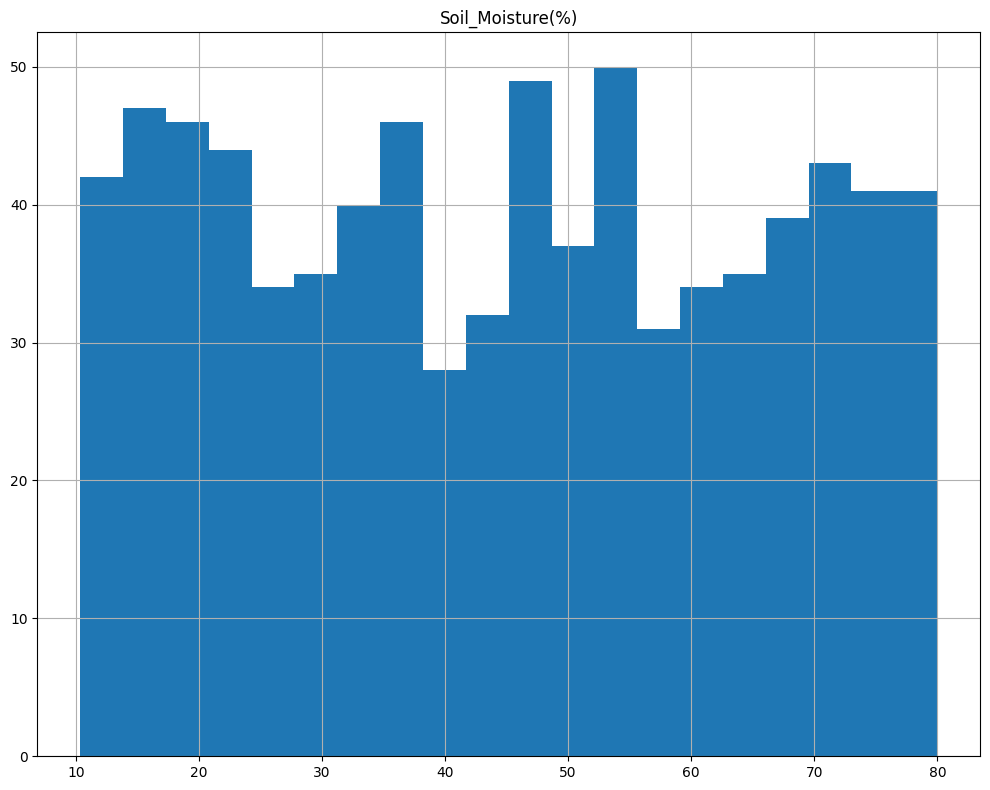

In [13]:
# 📈 Visualize Data Distribution
numeric_columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)']
df[numeric_columns].hist(bins=20, figsize=(10,8))
plt.tight_layout()
plt.show()

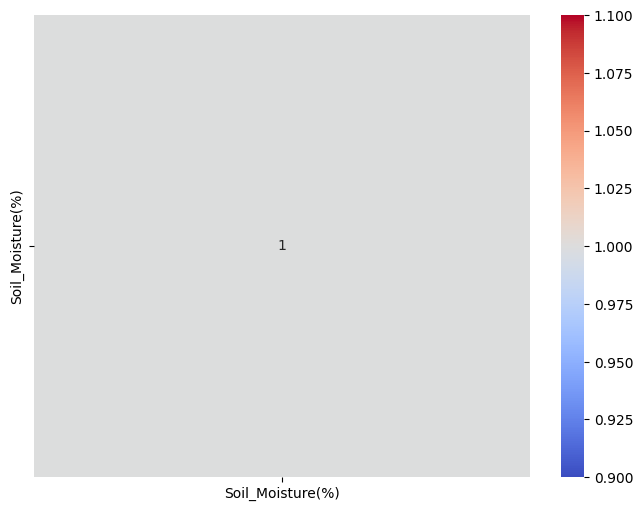

In [14]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# 🔍 Identify Key Variables for Fertilizer Recommendation
# Use correlation values
df.corr(numeric_only=True)['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)

KeyError: 'Fertilizer_Recommended(kg/ha)'

In [ ]:
# 📊 Find Crop with Highest Average Soil Moisture
df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

In [ ]:
# 📑 Recommend Irrigation Adjustments for High Temperature Crops
df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()

In [ ]:
# 💾 Save Clean Dataset
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)